# Kelompok 4


*   Syifa Putri Fadhilla (1305210084)
*   Rosalie Naurah Husna (1305210101)
*   Nakhwa Azizah (1305213023)




In [1]:
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
url = "https://raw.githubusercontent.com/nakhwaazizah/Dataset/main/labeled_text.csv"

data = pd.read_csv(url)

print(data.head())

                                                text  \
0          Hotel dengan kamar yang besar dan bersih.   
1    Staff ramah, makanan enak. Lokasinya strategis.   
2  Setiap ke Bandung selalu nginep di hotel ini. ...   
3  Pelayanan ramah, lokasi strategis dekat dengan...   
4  Menginap di sini saat hotel-hotel pada full bo...   

                                          clean_text  \
0          hotel dengan kamar yang besar dan bersih.   
1    staff ramah, makanan enak. lokasinya strategis.   
2  setiap ke bandung selalu nginep di hotel ini. ...   
3  pelayanan ramah, lokasi strategis dekat dengan...   
4  menginap di sini saat hotel-hotel pada full bo...   

                                     translated_text  subjektivitas  \
0                  hotel with large and clean rooms.       0.564286   
1  friendly staff, delicious food. strategic loca...       0.750000   
2  every time i go to bandung i always stay at th...       0.800000   
3  friendly service, strategic location cl

In [3]:
print("Jumlah duplikasi:", data.duplicated().sum())

Jumlah duplikasi: 26


In [4]:
# Drop duplicates
data = data.drop_duplicates()
print("Jumlah duplikasi setelah penghapusan:", data.duplicated().sum())

Jumlah duplikasi setelah penghapusan: 0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6234 entries, 0 to 6259
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             6234 non-null   object 
 1   clean_text       6234 non-null   object 
 2   translated_text  6233 non-null   object 
 3   subjektivitas    6233 non-null   float64
 4   polaritas        6233 non-null   float64
 5   sentimen         6234 non-null   object 
dtypes: float64(2), object(4)
memory usage: 340.9+ KB


In [6]:
data = data[['text', 'sentimen']].copy()
data.head()

,text,sentimen
0,Hotel dengan kamar yang besar dan bersih.,positif
1,"Staff ramah, makanan enak. Lokasinya strategis.",positif
2,Setiap ke Bandung selalu nginep di hotel ini. ...,positif
3,"Pelayanan ramah, lokasi strategis dekat dengan...",positif
4,Menginap di sini saat hotel-hotel pada full bo...,positif


In [7]:
import re

#membuat fungsi untuk case folding
def casefolding(text):
  text = text.lower() #mengubah kalimat menjadi huruf kecil
  text = re.sub(r'https?://\S+|www\.\S+', '', text) #menghapus urll dari kalimat
  text = re.sub(r'[-+]?[0-9]+', '', text) #mmenghapus angka dari kalimat
  text = re.sub(r'[^\w\s]', '', text) #menghapus tanda baca dari kalimat
  text = text.strip()
  return text

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [9]:
len(stopwords_ind)

758

In [10]:
#melihat daftar stopwords dari nltk
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [11]:
# membuat fungsi stopword removal

# menambahkan kata dalam stopword
more_stopword = ['btw']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text .split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [12]:
# Example raw data
raw_sample = data['text'].iloc[2]

# Case folding
case_folding = casefolding(raw_sample)

# Stopword removal (assuming `remove_stop_words` function exists)
stopword_removal = remove_stop_words(case_folding)

print('Raw Data \t\t :', raw_sample)  # Corrected from `raw_data` to `raw_sample`
print('Case Folding \t\t :', case_folding)
print('Stopword Removal \t :', stopword_removal)

Raw Data 		 : Setiap ke Bandung selalu nginep di hotel ini. Fasilitas nya oke banget. Makanannya juga bervariasi dan enak-enak semua.
Case Folding 		 : setiap ke bandung selalu nginep di hotel ini fasilitas nya oke banget makanannya juga bervariasi dan enakenak semua
Stopword Removal 	 : bandung nginep hotel fasilitas nya oke banget makanannya bervariasi enakenak


In [13]:
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.4 MB/s eta 0:00:00


In [14]:
#merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#membuat fungsi untuk stemming bahasa indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [15]:
raw_sample = data['text'].iloc[2]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('Stopword removeal \t :', stopword_removal)
print('Stemming \t\t :', text_stemming)

Raw Data 		 : Setiap ke Bandung selalu nginep di hotel ini. Fasilitas nya oke banget. Makanannya juga bervariasi dan enak-enak semua.
Case Folding 		 : setiap ke bandung selalu nginep di hotel ini fasilitas nya oke banget makanannya juga bervariasi dan enakenak semua
Stopword removeal 	 : bandung nginep hotel fasilitas nya oke banget makanannya bervariasi enakenak
Stemming 		 : bandung nginep hotel fasilitas nya oke banget makan variasi enakenak


In [16]:
#membuat fungsi untuk menggabungkan seluruh langkah text preeprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = remove_stop_words(text)
  text = stemming(text)

  return text


In [17]:
%%time
data['clean_teks'] = data['text'].apply(text_preprocessing_process)

CPU times: user 13min 6s, sys: 2.16 s, total: 13min 8s
Wall time: 13min 51s


In [18]:
#simpan data
data.to_csv('clean_data.csv')

# Feature Engineering

In [19]:
data = pd.read_csv('/content/clean_data.csv')
data.head()

,Unnamed: 0,text,sentimen,clean_teks
0,0,Hotel dengan kamar yang besar dan bersih.,positif,hotel kamar bersih
1,1,"Staff ramah, makanan enak. Lokasinya strategis.",positif,staff ramah makan enak lokasi strategis
2,2,Setiap ke Bandung selalu nginep di hotel ini. ...,positif,bandung nginep hotel fasilitas nya oke banget ...
3,3,"Pelayanan ramah, lokasi strategis dekat dengan...",positif,layan ramah lokasi strategis braga mini mart j...
4,4,Menginap di sini saat hotel-hotel pada full bo...,positif,inap hotelhotel full booked event kamar luas b...


In [20]:
# Memisahkan feature dan target
X = data['clean_teks']
y = data['sentimen']

In [21]:
X

0                                      hotel kamar bersih
1                 staff ramah makan enak lokasi strategis
2       bandung nginep hotel fasilitas nya oke banget ...
3       layan ramah lokasi strategis braga mini mart j...
4       inap hotelhotel full booked event kamar luas b...
                              ...                        
6229    kamar pesan penuh ditawarin free upgrade kamar...
6230    kamar hadap langsung jalan raya berisik banget...
6231    mes bedroom pesan parayangan kamar tidur sesua...
6232                                                jelek
6233                        gosok gigi sedia telpon antar
Name: clean_teks, Length: 6234, dtype: object

In [22]:
y

0       positif
1       positif
2       positif
3       positif
4       positif
         ...   
6229    positif
6230    positif
6231    negatif
6232    negatif
6233    negatif
Name: sentimen, Length: 6234, dtype: object

# Feature Extraction (TF-IDF dan N-Gram)

In [23]:
#save model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tfidf = vec_TF_IDF.transform(X)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.sav", "wb"))

In [24]:
#menampikan  vocabulary dari hasil tf-idf

vec_TF_IDF.vocabulary_

{'hotel': 2343,
 'kamar': 2702,
 'bersih': 683,
 'staff': 5714,
 'ramah': 4807,
 'makan': 3495,
 'enak': 1738,
 'lokasi': 3394,
 'strategis': 5779,
 'bandung': 412,
 'nginep': 4061,
 'fasilitas': 1869,
 'nya': 4138,
 'oke': 4229,
 'banget': 426,
 'variasi': 6442,
 'enakenak': 1742,
 'layan': 3258,
 'braga': 861,
 'mini': 3803,
 'mart': 3610,
 'jam': 2559,
 'mudah': 3900,
 'kl': 2980,
 'butuh': 957,
 'alhamdulillah': 120,
 'best': 725,
 'view': 6464,
 'inap': 2426,
 'hotelhotel': 2347,
 'full': 1953,
 'booked': 839,
 'event': 1800,
 'luas': 3430,
 'tamu': 5925,
 'milih': 3794,
 'sesi': 5463,
 'sarap': 5216,
 'restoran': 5015,
 'lantai': 3232,
 'jumat': 2651,
 'mesjid': 3770,
 'deket': 1376,
 'pusat': 4768,
 'kuliner': 3128,
 'belanja': 592,
 'bagus': 350,
 'ruang': 5107,
 'nyaman': 4147,
 'tidur': 6143,
 'cocok': 1161,
 'keluarga': 2831,
 'anak': 175,
 'terthe': 6089,
 'kali': 2698,
 'kes': 2916,
 'kids': 2957,
 'friendly': 1942,
 'housekeeping': 2363,
 'cepat': 1043,
 'tanggap': 5936,


In [25]:
#melihat jumlah feature
print(len(vec_TF_IDF.get_feature_names_out()))

6664


In [26]:
#menampilkan feature apa saja yg ada di dalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aaja' 'aamiin' ... 'zone' 'zonk' 'zuhur']


In [27]:
#membuat data tabular dati TF-IDF

x1 = vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf = pd.DataFrame(x1, columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aaja,aamiin,abai,abang,abar,abis,abk,able,about,...,yuhu,yuk,yum,yummy,yups,zaman,zink,zone,zonk,zuhur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412714,0.0
6230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [28]:
#menampilkan data tabular yg ada nilai / ada bobotnya

data_tabular_tf_idf.iloc[10:20,60:70]

,agen,aging,agst,agung,agust,agustus,agwnr,ah,ahad,ahirnya
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [29]:
x_train = np.array(data_tabular_tf_idf )
y_train = np.array(y)

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd

chi2_feature = SelectKBest(chi2, k=5000)
x_kbest_features = chi2_feature.fit_transform(x_train, y_train)

#untuk reduce feature
print('Original Feature Number', x_train.shape[1])
print('Reduce feature Number', x_kbest_features.shape[1])

Original Feature Number 6664
Reduce feature Number 5000


In [31]:
Data = pd.DataFrame(chi2_feature.scores_,columns=['Nilai'])
Data

,Nilai
0,0.065083
1,0.026402
2,0.429708
3,0.058435
4,0.020317
...,...
6659,0.040153
6660,0.071615
6661,0.057267
6662,0.099842


In [32]:
#menampilkan data feature beserta nilainya / pembobotannya

feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fiture'] = feature
Data

,Nilai,Fiture
0,0.065083,aa
1,0.026402,aaja
2,0.429708,aamiin
3,0.058435,abai
4,0.020317,abang
...,...,...
6659,0.040153,zaman
6660,0.071615,zink
6661,0.057267,zone
6662,0.099842,zonk


In [33]:
#mengurutkan feature terbaik

Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fiture
3081,73.204491,kotor
944,63.524589,buruk
2602,54.965334,jelek
2791,47.346043,kecewa
529,36.375829,bau
...,...,...
1898,0.005226,finished
4683,0.005226,pressed
1830,0.005226,expected
6505,0.005226,wants


In [34]:
mask = chi2_feature.get_support()
mask

array([ True, False,  True, ...,  True,  True,  True])

In [35]:
#menampilkan fitur yang terpilih berdasarkan nilai mask dan chi tertinggi yang udah ditetapkan pada chi square

new_feature=[]
for bool, f in zip(mask, feature):
  if bool :
    new_feature.append(f)
  selected_Feature=new_feature
selected_Feature

['aa',
 'aamiin',
 'abai',
 'abis',
 'about',
 'abu',
 'ac',
 'acara',
 'access',
 'accommodation',
 'acnya',
 'acr',
 'acung',
 'ad',
 'ada',
 'adain',
 'adan',
 'add',
 'additional',
 'ade',
 'adem',
 'adha',
 'adidas',
 'adik',
 'adu',
 'aduh',
 'adzan',
 'affordable',
 'africa',
 'afrika',
 'afrikapetugas',
 'after',
 'aga',
 'again',
 'agam',
 'agama',
 'agen',
 'agst',
 'agust',
 'ah',
 'ahad',
 'ahirnya',
 'ain',
 'air',
 'airy',
 'aj',
 'aja',
 'ajak',
 'ajakurang',
 'ajar',
 'ajib',
 'aju',
 'akad',
 'akal',
 'akhrnya',
 'akibat',
 'akomendasi',
 'akomodasi',
 'akomodatif',
 'akses',
 'aktif',
 'aktivitas',
 'ala',
 'alam',
 'alami',
 'alangkah',
 'alarm',
 'alas',
 'alat',
 'alatalatnya',
 'alau',
 'alergi',
 'alert',
 'alfa',
 'alfaexpress',
 'alfamart',
 'alhamdulilah',
 'alhamdulillaah',
 'alhamdulillah',
 'alhasil',
 'alias',
 'alih',
 'alir',
 'all',
 'allah',
 'alloh',
 'allowed',
 'almost',
 'alokasi',
 'alot',
 'alpha',
 'also',
 'alternatif',
 'although',
 'alun',
 '

In [36]:
#membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_Feature:
    new_selected_feature[k]=v

new_selected_feature

{'hotel': 2343,
 'kamar': 2702,
 'bersih': 683,
 'staff': 5714,
 'ramah': 4807,
 'makan': 3495,
 'enak': 1738,
 'lokasi': 3394,
 'strategis': 5779,
 'bandung': 412,
 'nginep': 4061,
 'fasilitas': 1869,
 'nya': 4138,
 'oke': 4229,
 'banget': 426,
 'variasi': 6442,
 'enakenak': 1742,
 'layan': 3258,
 'braga': 861,
 'mini': 3803,
 'mart': 3610,
 'jam': 2559,
 'mudah': 3900,
 'kl': 2980,
 'butuh': 957,
 'alhamdulillah': 120,
 'best': 725,
 'view': 6464,
 'inap': 2426,
 'hotelhotel': 2347,
 'full': 1953,
 'booked': 839,
 'event': 1800,
 'luas': 3430,
 'tamu': 5925,
 'milih': 3794,
 'sesi': 5463,
 'sarap': 5216,
 'restoran': 5015,
 'lantai': 3232,
 'jumat': 2651,
 'mesjid': 3770,
 'deket': 1376,
 'pusat': 4768,
 'kuliner': 3128,
 'belanja': 592,
 'bagus': 350,
 'ruang': 5107,
 'nyaman': 4147,
 'tidur': 6143,
 'cocok': 1161,
 'keluarga': 2831,
 'anak': 175,
 'terthe': 6089,
 'kali': 2698,
 'kes': 2916,
 'kids': 2957,
 'friendly': 1942,
 'housekeeping': 2363,
 'cepat': 1043,
 'tanggap': 5936,


In [37]:
len(new_selected_feature)

5000

In [38]:
#menyimpan selected feature yang baru
pickle.dump(new_selected_feature,open("new_selected_feature_tf-idf.sav","wb"))

In [39]:
data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_Feature)
data_selected_feature

,aa,aamiin,abai,abis,about,abu,ac,acara,access,accommodation,...,youtube,youu,yuhu,yuk,yups,zaman,zink,zone,zonk,zuhur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412714,0.0
6230,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6231,0.0,0.0,0.0,0.0,0.0,0.0,0.16751,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6232,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [40]:
from imblearn.over_sampling import SMOTE

In [42]:
from sklearn.model_selection import train_test_split
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_kbest_features, y)

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [43]:
# Menghitung jumlah data setiap kelas sentimen setelah oversampling
sentimen_setelah_oversampling = pd.Series(y_resampled).value_counts()

# Tampilkan jumlah data setiap kelas sentimen
print("Jumlah data setelah oversampling:\n", sentimen_setelah_oversampling)


Jumlah data setelah oversampling:
 sentimen
positif    5574
negatif    5574
netral     5574
Name: count, dtype: int64


# Modelling

In [44]:
selected_x =x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [46]:
print('Banyaknya X_train :', len(x_train))
print('Banyaknya X_test :', len(x_test))
print('Banyaknya Y_train :', len(y_train))
print('Banyaknya Y_train :', len(y_train))

Banyaknya X_train : 13377
Banyaknya X_test : 3345
Banyaknya Y_train : 13377
Banyaknya Y_train : 13377


In [47]:
text_algorithm = MultinomialNB()

In [48]:
model = text_algorithm.fit(x_train, y_train)

In [50]:
data_input = ("Setiap ke Bandung selalu nginep di hotel ini. Fasilitas nya oke banget. Makanannya juga bervariasi dan enak-enak semua.")
data_input = text_preprocessing_process(data_input)

tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error='replace', vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))
hasil = model.predict(loaded_vec.fit_transform([data_input]))

if(hasil == 'positif'):
  s = "Sentimen Positif"
elif(hasil == 'negatif'):
  s = "Sentimen Negatif"
else:
  s = "Sentimen Netral"

print ("Hasil Prediksi : \n",s)

Hasil Prediksi : 
 Sentimen Positif


# Evaluasi Model

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

predicted = model.predict(x_test)
CM = confusion_matrix(y_test, predicted)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

     negatif       0.89      0.93      0.91      1131
      netral       0.92      0.97      0.95      1106
     positif       0.93      0.83      0.87      1108

    accuracy                           0.91      3345
   macro avg       0.91      0.91      0.91      3345
weighted avg       0.91      0.91      0.91      3345



In [52]:
pickle.dump(model,open("model_sentimen.sav","wb"))

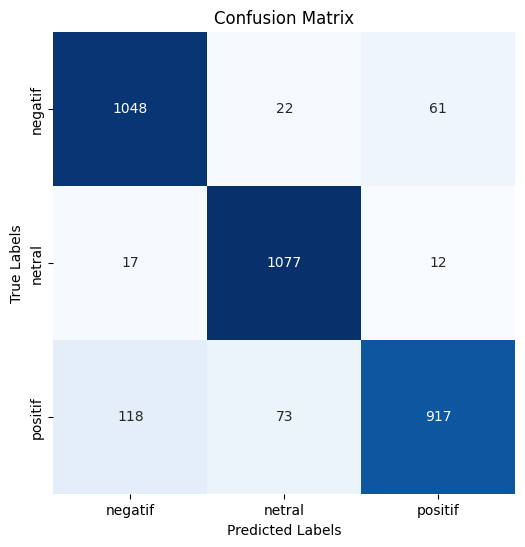

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Contoh confusion matrix yang telah dihasilkan sebelumnya
# Misalnya CM adalah confusion matrix yang sudah dihitung sebelumnya

# Labels untuk confusion matrix
labels = ['negatif', 'netral', 'positif']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


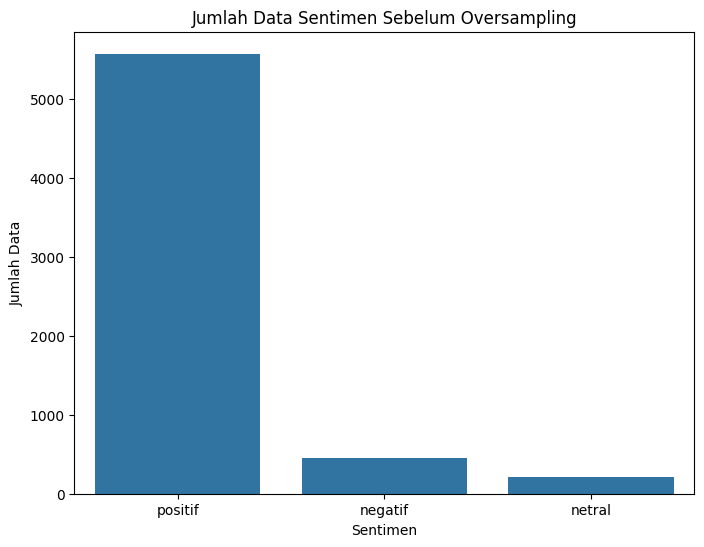

In [54]:

# Data sentimen sebelum oversampling
sentimen_sebelum_oversampling = data['sentimen'].value_counts()

# Plot bar chart untuk sentimen sebelum oversampling
plt.figure(figsize=(8, 6))
sns.barplot(x=sentimen_sebelum_oversampling.index, y=sentimen_sebelum_oversampling.values)
plt.title('Jumlah Data Sentimen Sebelum Oversampling')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.show()

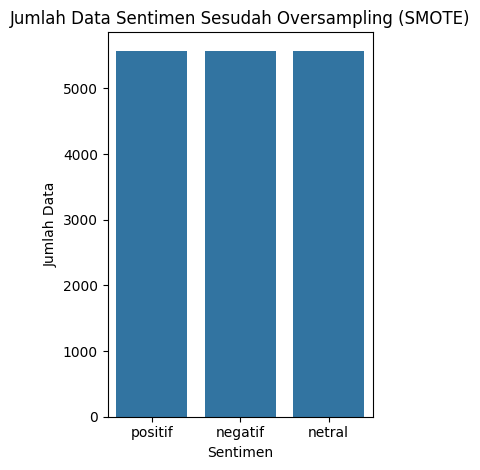

In [55]:
# Plot bar chart untuk sentimen sesudah oversampling
plt.subplot(1, 2, 2)
sns.barplot(x=sentimen_setelah_oversampling.index, y=sentimen_setelah_oversampling.values)
plt.title('Jumlah Data Sentimen Sesudah Oversampling (SMOTE)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()